## Importing Modules

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install nltk

import nltk #a natural language processing toolkit module associated in anaconda
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Defaulting to user installation because normal site-packages is not writeable


In [147]:
df = pd.read_csv(r"C:\Users\User\Downloads\archive\nltk_split.csv")
df.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0            id  \
0             0             0           0  1.030000e+18   
1             1             1           1  1.030000e+18   
2             2             2           2  1.030000e+18   
3             3             3           3  1.030000e+18   
4             4             4           4  1.030000e+18   

                                                text  favorite_count  \
0      Gotta love the facts. https://t.co/bZ2G8AZuo9               0   
1  RT @ToolangiForest: A great day of action for ...               0   
2  @jonkudelka Harvey Norman reckons climate chan...               2   
3  RT @jayrosen_nyu: Why does skepticism about im...               0   
4  RT @FranceinIreland: On 5th November we call a...               0   

   retweet_count                 created_at coordinates  \
0              0  2018-08-13 10:40:21+00:00         NaN   
1             35  2018-08-13 10:40:10+00:00         NaN   
2              0  2018-08-13 10:40:43+00:00         NaN   
3             52  2018-08-13 10:40:43+00:00         NaN   
4             16  2018-08-13 10:41:58+00:00         NaN   

                                               score    neg    neu    pos  \
0  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...  0.000  0.488  0.512   
1  {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...  0.000  0.651  0.349   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
3  {'neg': 0.146, 'neu': 0.62, 'pos': 0.234, 'com...  0.146  0.620  0.234   
4  {'neg': 0.095, 'neu': 0.657, 'pos': 0.248, 'co...  0.095  0.657  0.248   

   compound created_at_date  Unnamed: 15  Unnamed: 16  
0    0.6369       8/13/2018          NaN          NaN  
1    0.8805       8/13/2018          NaN          NaN  
2    0.0000       8/13/2018          NaN          NaN  
3    0.5267       8/13/2018          NaN          NaN  
4    0.4939       8/13/2018          NaN          NaN

In [148]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'text',
       'favorite_count', 'retweet_count', 'created_at', 'coordinates', 'score',
       'neg', 'neu', 'pos', 'compound', 'created_at_date', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163669 entries, 0 to 163668
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0.2     163669 non-null  int64  
 1   Unnamed: 0.1     163669 non-null  int64  
 2   Unnamed: 0       163669 non-null  int64  
 3   id               163669 non-null  float64
 4   text             163669 non-null  object 
 5   favorite_count   163669 non-null  int64  
 6   retweet_count    163669 non-null  int64  
 7   created_at       163669 non-null  object 
 8   coordinates      43 non-null      object 
 9   score            163669 non-null  object 
 10  neg              163669 non-null  float64
 11  neu              163669 non-null  float64
 12  pos              163669 non-null  float64
 13  compound         163669 non-null  float64
 14  created_at_date  163669 non-null  object 
 15  Unnamed: 15      0 non-null       float64
 16  Unnamed: 16      0 non-null       floa

In [150]:
df.isnull().sum()

Unnamed: 0.2            0
Unnamed: 0.1            0
Unnamed: 0              0
id                      0
text                    0
favorite_count          0
retweet_count           0
created_at              0
coordinates        163626
score                   0
neg                     0
neu                     0
pos                     0
compound                0
created_at_date         0
Unnamed: 15        163669
Unnamed: 16        163669
dtype: int64

## Data Cleaning

In [151]:
##Removing the Null values
### Since the coordinates col is mostly null along with Unnamed: 15, Unnamed: 16 I would be droping them

df.drop(['coordinates', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [152]:
df.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0            id  \
0             0             0           0  1.030000e+18   
1             1             1           1  1.030000e+18   
2             2             2           2  1.030000e+18   
3             3             3           3  1.030000e+18   
4             4             4           4  1.030000e+18   

                                                text  favorite_count  \
0      Gotta love the facts. https://t.co/bZ2G8AZuo9               0   
1  RT @ToolangiForest: A great day of action for ...               0   
2  @jonkudelka Harvey Norman reckons climate chan...               2   
3  RT @jayrosen_nyu: Why does skepticism about im...               0   
4  RT @FranceinIreland: On 5th November we call a...               0   

   retweet_count                 created_at  \
0              0  2018-08-13 10:40:21+00:00   
1             35  2018-08-13 10:40:10+00:00   
2              0  2018-08-13 10:40:43+00:00   
3             52  2018-08-13 10:40:43+00:00   
4             16  2018-08-13 10:41:58+00:00   

                                               score    neg    neu    pos  \
0  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...  0.000  0.488  0.512   
1  {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...  0.000  0.651  0.349   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
3  {'neg': 0.146, 'neu': 0.62, 'pos': 0.234, 'com...  0.146  0.620  0.234   
4  {'neg': 0.095, 'neu': 0.657, 'pos': 0.248, 'co...  0.095  0.657  0.248   

   compound created_at_date  
0    0.6369       8/13/2018  
1    0.8805       8/13/2018  
2    0.0000       8/13/2018  
3    0.5267       8/13/2018  
4    0.4939       8/13/2018

In [153]:
#I will be dropping the Unnamed: 0, 0.1, 0.1.1 and making the id column proper
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2', 'id'], axis=1, inplace=True)
df = df.reset_index(drop=True)

In [154]:
df.head()

text  favorite_count  \
0      Gotta love the facts. https://t.co/bZ2G8AZuo9               0   
1  RT @ToolangiForest: A great day of action for ...               0   
2  @jonkudelka Harvey Norman reckons climate chan...               2   
3  RT @jayrosen_nyu: Why does skepticism about im...               0   
4  RT @FranceinIreland: On 5th November we call a...               0   

   retweet_count                 created_at  \
0              0  2018-08-13 10:40:21+00:00   
1             35  2018-08-13 10:40:10+00:00   
2              0  2018-08-13 10:40:43+00:00   
3             52  2018-08-13 10:40:43+00:00   
4             16  2018-08-13 10:41:58+00:00   

                                               score    neg    neu    pos  \
0  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...  0.000  0.488  0.512   
1  {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...  0.000  0.651  0.349   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
3  {'neg': 0.146, 'neu': 0.62, 'pos': 0.234, 'com...  0.146  0.620  0.234   
4  {'neg': 0.095, 'neu': 0.657, 'pos': 0.248, 'co...  0.095  0.657  0.248   

   compound created_at_date  
0    0.6369       8/13/2018  
1    0.8805       8/13/2018  
2    0.0000       8/13/2018  
3    0.5267       8/13/2018  
4    0.4939       8/13/2018

In [155]:
#checking if any -ve values exist in compound col 
print(df[df['compound'] < 0].head()['compound']) #this is done to see if neg sentiment is represented with negative values.

6    -0.3818
9    -0.7906
11   -0.8122
15   -0.7783
17   -0.3182
Name: compound, dtype: float64


In [156]:
df['score'][0]

"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}"

Since we are having more than 4 columns just for the type of sentiment I would like to reduce it to a single column. I want to generalize the values as well. If a value is less than 0 then it is negative, if it is 0 then neutral and positive otherwise.

In [157]:
df.drop(['score', 'neg', 'neu', 'pos'], axis=1, inplace=True)

In [158]:
df.head()

text  favorite_count  \
0      Gotta love the facts. https://t.co/bZ2G8AZuo9               0   
1  RT @ToolangiForest: A great day of action for ...               0   
2  @jonkudelka Harvey Norman reckons climate chan...               2   
3  RT @jayrosen_nyu: Why does skepticism about im...               0   
4  RT @FranceinIreland: On 5th November we call a...               0   

   retweet_count                 created_at  compound created_at_date  
0              0  2018-08-13 10:40:21+00:00    0.6369       8/13/2018  
1             35  2018-08-13 10:40:10+00:00    0.8805       8/13/2018  
2              0  2018-08-13 10:40:43+00:00    0.0000       8/13/2018  
3             52  2018-08-13 10:40:43+00:00    0.5267       8/13/2018  
4             16  2018-08-13 10:41:58+00:00    0.4939       8/13/2018

In [159]:
#Now lets update the column compund into 'sentiment' and update the values.
#First let's update the values.
df['compound'].mask(df['compound'] < 0, -1, inplace=True)
df['compound'].mask(df['compound'] > 0, 1, inplace=True)
df.head()


text  favorite_count  \
0      Gotta love the facts. https://t.co/bZ2G8AZuo9               0   
1  RT @ToolangiForest: A great day of action for ...               0   
2  @jonkudelka Harvey Norman reckons climate chan...               2   
3  RT @jayrosen_nyu: Why does skepticism about im...               0   
4  RT @FranceinIreland: On 5th November we call a...               0   

   retweet_count                 created_at  compound created_at_date  
0              0  2018-08-13 10:40:21+00:00       1.0       8/13/2018  
1             35  2018-08-13 10:40:10+00:00       1.0       8/13/2018  
2              0  2018-08-13 10:40:43+00:00       0.0       8/13/2018  
3             52  2018-08-13 10:40:43+00:00       1.0       8/13/2018  
4             16  2018-08-13 10:41:58+00:00       1.0       8/13/2018

In [160]:
df.rename(columns={'compound': 'sentiment'}, inplace=True)
df.head()

text  favorite_count  \
0      Gotta love the facts. https://t.co/bZ2G8AZuo9               0   
1  RT @ToolangiForest: A great day of action for ...               0   
2  @jonkudelka Harvey Norman reckons climate chan...               2   
3  RT @jayrosen_nyu: Why does skepticism about im...               0   
4  RT @FranceinIreland: On 5th November we call a...               0   

   retweet_count                 created_at  sentiment created_at_date  
0              0  2018-08-13 10:40:21+00:00        1.0       8/13/2018  
1             35  2018-08-13 10:40:10+00:00        1.0       8/13/2018  
2              0  2018-08-13 10:40:43+00:00        0.0       8/13/2018  
3             52  2018-08-13 10:40:43+00:00        1.0       8/13/2018  
4             16  2018-08-13 10:41:58+00:00        1.0       8/13/2018

Since our goal is to predict the sentiment based on text we only need the `text` col and `sentiment` column for this task.

In [161]:
df.drop(['created_at_date', 'favorite_count', 'created_at', 'created_at_date'], axis=1, inplace=True)

Negative    59434
Positive    55411
Neutral     48824
Name: sentiment, dtype: int64


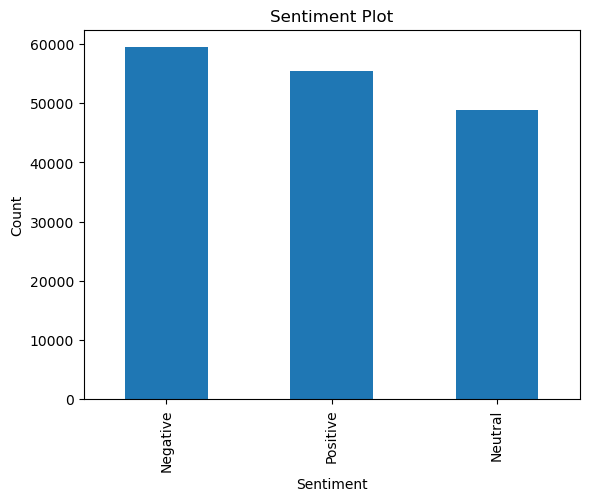

In [162]:
# Visualising the distribution of the target variable i.e `sentiment`.

sentiment = {0:"Neutral", 1:"Positive", -1: 'Negative'}
print(df.sentiment.apply(lambda x: sentiment[x]).value_counts())
df.sentiment.apply(lambda x: sentiment[x]).value_counts().plot(kind = 'bar')
plt.title("Sentiment Plot")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Preprocessing the text data

### Converting to lower case

In [163]:
df['text']=df['text'].str.lower()
df['text'].tail()

163664    #rrn https://t.co/9dtuwybyzn e.p.a. cancels ta...
163665    rt @time: the epa has pulled its scientists fr...
163666    rt @cathmckenna: we must all take action on #c...
163667    rt @time: the epa has pulled its scientists fr...
163668    rt @realjameswoods: guarantee the mainstream m...
Name: text, dtype: object

## Stop word handling

In [164]:
# Defining stopwords

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [165]:
# Removing Stopwords

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].tail()

163664    #rrn https://t.co/9dtuwybyzn e.p.a. cancels ta...
163665    rt @time: epa pulled scientists climate change...
163666    rt @cathmckenna: must take action #climatechan...
163667    rt @time: epa pulled scientists climate change...
163668    rt @realjameswoods: guarantee mainstream media...
Name: text, dtype: object

In [166]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer=ToktokTokenizer() 
nltk.download('stopwords')
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

NLTK stop word lists 

{'of', 'above', 'themselves', 'will', 'through', 'it', "isn't", 'herself', "it's", 'against', 'down', "won't", "wouldn't", 'into', "you've", 'm', 'under', 'an', 'by', 'again', "don't", 'wouldn', 'more', 'ours', 'be', 'while', 'from', 'am', 'nor', 'itself', 'few', 'most', 'about', "shan't", 'so', 'too', 't', 'off', "that'll", 'here', 'you', 'haven', 'yours', 'if', 'and', 'when', 'has', "needn't", 'myself', 'hasn', 'other', 'those', 'is', 'now', 'which', 'o', 'on', 'same', 'yourselves', 'very', 'own', 'both', 'any', 'were', 'wasn', 'as', 'our', 'but', 'does', 'until', 'needn', 'during', 'only', 'or', 'y', 'its', "aren't", 'no', 'up', 'out', "mustn't", 'should', 'shan', 'the', 'there', 'further', 'some', "you're", 'couldn', 'with', 'how', 'him', 'then', 'ourselves', 'isn', "didn't", 'won', 'theirs', 'did', 'doesn', 'hadn', 'between', 'i', 'her', 'hers', "hasn't", 're', 'being', 'we', 'such', 'who', "you'd", "haven't", 'than', 'below', 'd', 'having', 'them', 'not', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [167]:
df['text'] = df['text'].apply(remove_stopwords)
df['text'].tail()

163664    #rrn https://t.co/9dtuwybyzn e.p.a. cancels ta...
163665    rt @time : epa pulled scientists climate chang...
163666    rt @cathmckenna : must take action #climatecha...
163667    rt @time : epa pulled scientists climate chang...
163668    rt @realjameswoods : guarantee mainstream medi...
Name: text, dtype: object

### Removing URLs and Numbers

In [168]:
#removing urls
import re

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].head()

0                                  gotta love facts.  
1    rt @toolangiforest : great day action message ...
2    @jonkudelka harvey norman reckons climate chan...
3    rt @jayrosen_nyu : skepticism immigration walk...
4    rt @franceinireland : 5th november call creati...
Name: text, dtype: object

In [169]:
# removing numbers 

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].head()

0                                  gotta love facts.  
1    rt @toolangiforest : great day action message ...
2    @jonkudelka harvey norman reckons climate chan...
3    rt @jayrosen_nyu : skepticism immigration walk...
4    rt @franceinireland : th november call creativ...
Name: text, dtype: object

In [170]:
# fucntion to removes pattern in the input text.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [171]:
# remove twitter handles (@user)

df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df.head()

text  retweet_count  sentiment
0                                gotta love facts.                0        1.0
1  rt  : great day action message “dear dan ” ! t...             35        1.0
2   harvey norman reckons climate change bunkum m...              0        0.0
3  rt  : skepticism immigration walk hand hand sk...             52        1.0
4  rt  : th november call creative citizens w/ pr...             16        1.0

In [172]:
# remove special characters, numbers and punctuations

df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df.head()

text  retweet_count  sentiment
0                                gotta love facts                 0        1.0
1  rt    great day action message  dear dan     t...             35        1.0
2   harvey norman reckons climate change bunkum m...              0        0.0
3  rt    skepticism immigration walk hand hand sk...             52        1.0
4  rt    th november call creative citizens w  pr...             16        1.0

In [173]:
#removing 'rt' from text which implies re posting or reusing contents of others.

df['text'] = df['text'].str.replace('rt', " ")
df.head()

text  retweet_count  sentiment
0                                gotta love facts                 0        1.0
1       great day action message  dear dan     to...             35        1.0
2   harvey norman reckons climate change bunkum m...              0        0.0
3       skepticism immigration walk hand hand ske...             52        1.0
4       th november call creative citizens w  pra...             16        1.0

In [174]:
# remove short words, since they are not going to be giving any meaning like u, ur etc.,

df['text'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

text  retweet_count  sentiment
0                                   gotta love facts              0        1.0
1  great action message dear toolangi community f...             35        1.0
2  harvey norman reckons climate change bunkum ma...              0        0.0
3  skepticism immigration walk hand hand skeptici...             52        1.0
4  november call creative citizens practical solu...             16        1.0

## Tokenizing the text

In [175]:
# Tokenizing the text

tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)
df['text'].head()

0                                 [gotta, love, facts]
1    [great, action, message, dear, toolangi, commu...
2    [harvey, norman, reckons, climate, change, bun...
3    [skepticism, immigration, walk, hand, hand, sk...
4    [november, call, creative, citizens, practical...
Name: text, dtype: object

## Stemming

In [176]:
# Applying Stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_on_text(x))
df['text'].head()
temp = df['text']
temp.head()

0                                 [gotta, love, facts]
1    [great, action, message, dear, toolangi, commu...
2    [harvey, norman, reckons, climate, change, bun...
3    [skepticism, immigration, walk, hand, hand, sk...
4    [november, call, creative, citizens, practical...
Name: text, dtype: object

## Lemmatization

In [177]:
# Applying Lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


text  retweet_count  sentiment
0                                    gotta love fact              0        1.0
1  great action message dear toolangi community f...             35        1.0
2  harvey norman reckons climate change bunkum ma...              0        0.0
3  skepticism immigration walk hand hand skeptici...             52        1.0
4  november call creative citizen practical solut...             16        1.0

## Exploratory Data Analysis

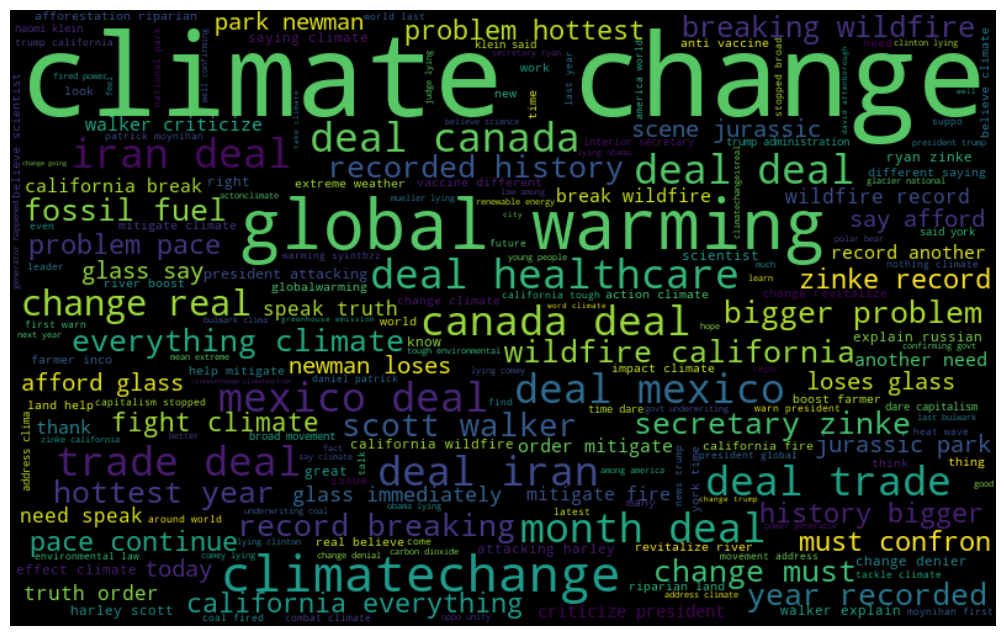

In [178]:
# visualize the frequent words
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

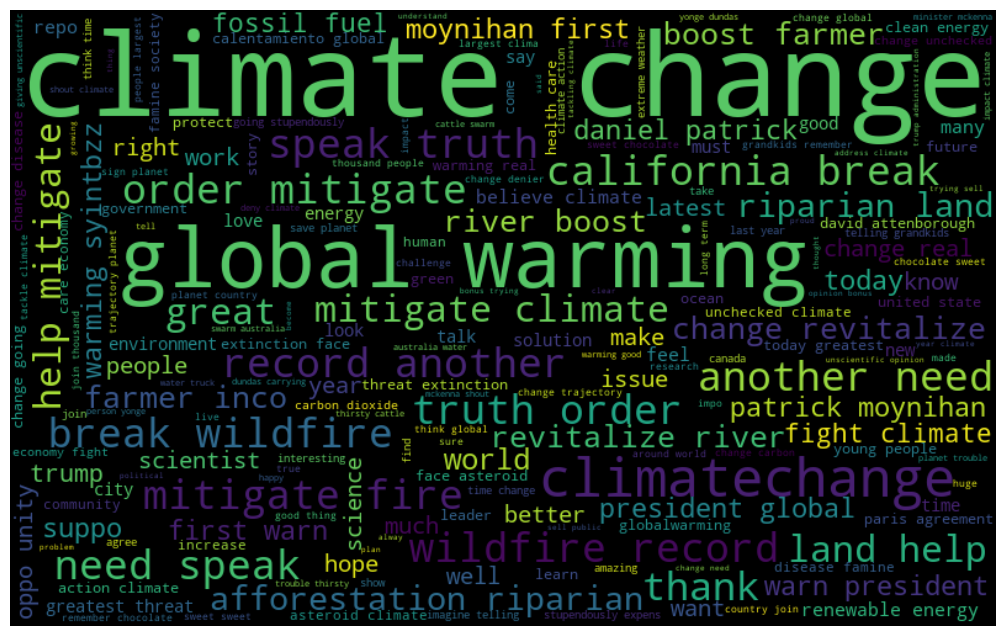

In [179]:
# frequent words visualization for +ve

all_words = " ".join([sentence for sentence in df['text'][df['sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

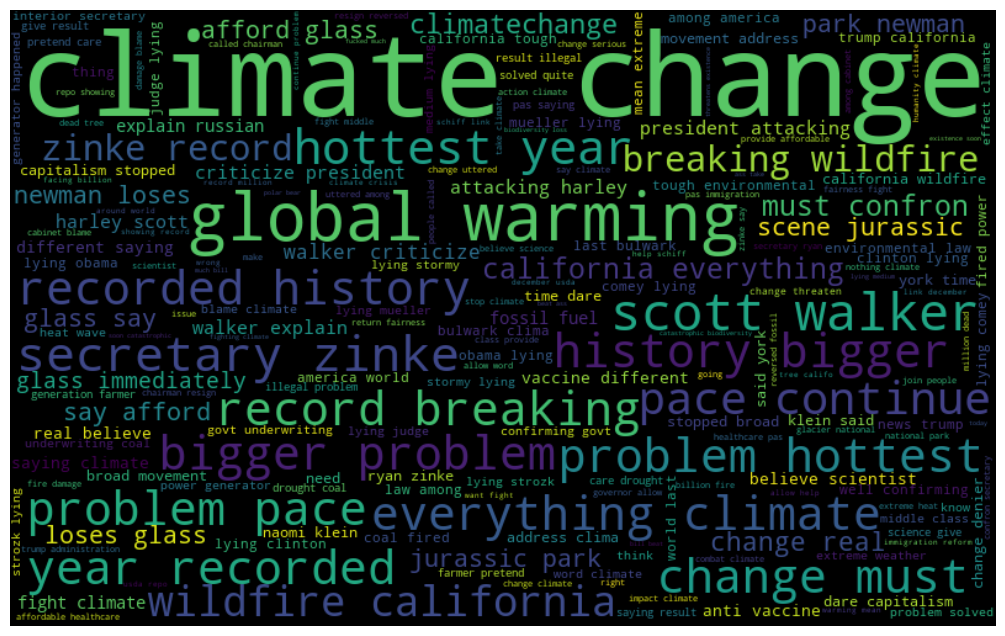

In [180]:
# frequent words visualization for -ve

all_words = " ".join([sentence for sentence in df['text'][df['sentiment']==-1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

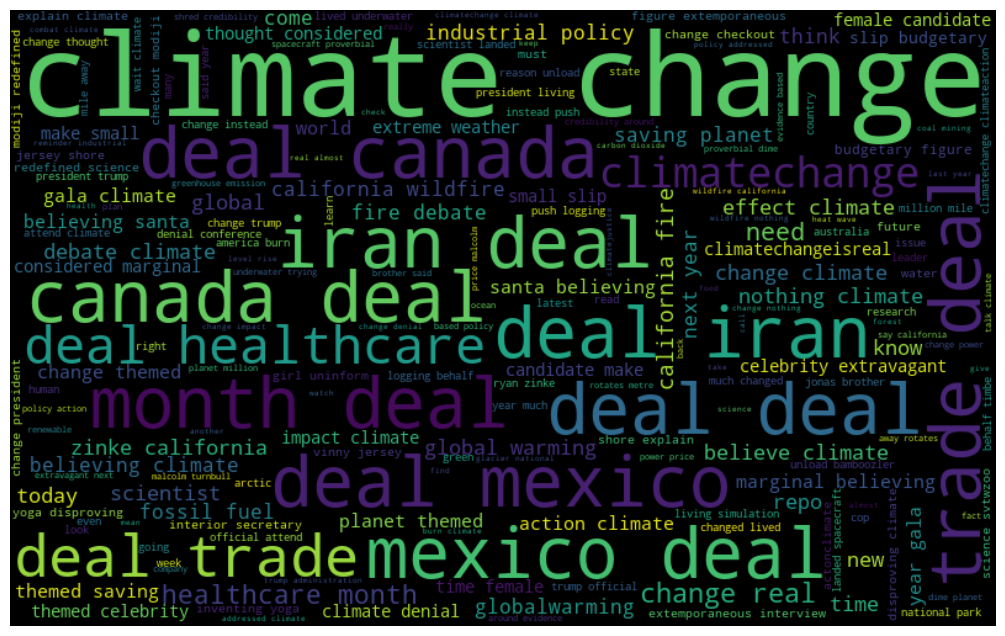

In [181]:
# frequent words visualization for neutral

all_words = " ".join([sentence for sentence in df['text'][df['sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Modelling

In [182]:
# Input Feature and Label

X = df.text
y = df.sentiment

In [183]:
# Splitting our data into Train and Test

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [184]:
# TFIDF : Extracting Tf-idf features

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=1000, stop_words='english')

tfidf.fit(list(X_train) + list(X_val))
X_train_tfidf = tfidf.transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [185]:
# Random Forest using Tf-idf features


rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf,y_train)
y_pred_rf = rf.predict(X_val_tfidf)
print('Random forest tfidf accuracy %s' % accuracy_score(y_pred_rf, y_val))

Random forest tfidf accuracy 0.5115352656532577


## Topic Modelling

In [186]:
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [187]:
#create dictionary
dictionary = corpora.Dictionary(temp)
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

1408186


In [188]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in temp ]
print(len(doc_term_matrix))

163669


In [189]:
#Instantiate LDA model
lda = gensim.models.ldamodel.LdaModel

In [190]:
num_topics=3
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

Wall time: 7min 31s


In [191]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.028*"global" + 0.026*"climatechange" + 0.023*"warming" + 0.007*"take" + 0.005*"world" + 0.005*"energy" + 0.005*"president" + 0.004*"carbon" + 0.004*"environment" + 0.004*"health"'),
 (1,
  '0.024*"says" + 0.016*"themed" + 0.013*"left" + 0.013*"said" + 0.009*"deal" + 0.008*"lying" + 0.008*"gala" + 0.008*"extravagant" + 0.007*"canada" + 0.007*"address"'),
 (2,
  '0.110*"climate" + 0.094*"change" + 0.009*"trump" + 0.007*"year" + 0.007*"people" + 0.007*"real" + 0.006*"like" + 0.005*"science" + 0.005*"much" + 0.005*"world"')]

In [192]:
#visualizing
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [193]:
# Assigns the topics to the documents in corpus
lda_corpus = ldamodel[doc_term_matrix]

In [194]:
[doc for doc in lda_corpus]

[[(0, 0.08337526), (1, 0.08338726), (2, 0.83323747)],
 [(0, 0.938221), (1, 0.030430218), (2, 0.031348832)],
 [(0, 0.3929499), (1, 0.15238453), (2, 0.45466557)],
 [(0, 0.085259825), (1, 0.5270163), (2, 0.38772386)],
 [(0, 0.72300386), (1, 0.14046675), (2, 0.1365294)],
 [(0, 0.08525312), (1, 0.52702165), (2, 0.38772526)],
 [(0, 0.5389362), (1, 0.23058122), (2, 0.23048256)],
 [(0, 0.13940981), (1, 0.043493908), (2, 0.8170963)],
 [(0, 0.036663514), (1, 0.7940298), (2, 0.16930674)],
 [(0, 0.04168194), (1, 0.042435795), (2, 0.9158823)],
 [(0, 0.19543572), (1, 0.04793716), (2, 0.75662714)],
 [(0, 0.26242095), (1, 0.033707608), (2, 0.7038714)],
 [(0, 0.9153112), (1, 0.039063364), (2, 0.045625392)],
 [(0, 0.88402987), (1, 0.057477463), (2, 0.058492716)],
 [(0, 0.2666923), (1, 0.54863566), (2, 0.184672)],
 [(0, 0.022910064), (1, 0.022351088), (2, 0.95473886)],
 [(0, 0.53054935), (1, 0.042010676), (2, 0.42744)],
 [(0, 0.030312736), (1, 0.9393747), (2, 0.030312587)],
 [(0, 0.048113704), (1, 0.0476

In [195]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))

threshold = sum(scores)/len(scores)
print(threshold)

0.33333333362542683


In [196]:
cluster1 = [j for i,j in zip(lda_corpus,df.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,df.index) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus,df.index) if i[2][1] > threshold]
# cluster4 = [j for i,j in zip(lda_corpus,df.index) if i[3][1] > threshold]
# cluster5 = [j for i,j in zip(lda_corpus,df.index) if i[4][1] > threshold]

print(len(cluster1))
print(len(cluster2))
print(len(cluster3))
# print(len(cluster4))
# print(len(cluster5))

87949
24019
103166


In [197]:
df.iloc[cluster1]

text  retweet_count  \
1       great action message dear toolangi community f...             35   
2       harvey norman reckons climate change bunkum ma...              0   
4       november call creative citizen practical solut...             16   
6                          send crap minute midnight mute              0   
12      opening icle reinforces need switch enviroment...              0   
...                                                   ...            ...   
163658        anyways bitch vote mama save global warming            295   
163660  local council tried ignore parisagreement sorx...              1   
163661  great thing horrific global warming induced na...              0   
163663       latest small town weekly rural climatechange              0   
163666                     must take action climatechange             21   

        sentiment  
1             1.0  
2             0.0  
4             1.0  
6            -1.0  
12            1.0  
...           ...  
163658       -1.0  
163660       -1.0  
163661        1.0  
163663        1.0  
163666        0.0  

[87949 rows x 3 columns]

In [198]:
df.iloc[cluster2]

text  retweet_count  \
3       skepticism immigration walk hand hand skeptici...             52   
5       skepticism immigration walk hand hand skeptici...             52   
8       many left claim climatechange responsible cawi...             99   
14      outsider turnbull jetlag jules little liberal ...              3   
17      scene jurassic park newman loses glass say aff...           7960   
...                                                   ...            ...   
163489  climatechange impact investing consider vegan ...              0   
163517                                                                 4   
163553  laki laki problema niya ootd meng kung maka co...             68   
163600                    capitalism climatechange suzuki              1   
163602  trump energy policy saturdaymorning resist tru...            305   

        sentiment  
3             1.0  
5             1.0  
8             1.0  
14            0.0  
17           -1.0  
...           ...  
163489        0.0  
163517        0.0  
163553        0.0  
163600        0.0  
163602        1.0  

[24019 rows x 3 columns]

In [199]:
df.iloc[cluster3]

text  retweet_count  \
0                                         gotta love fact              0   
2       harvey norman reckons climate change bunkum ma...              0   
3       skepticism immigration walk hand hand skeptici...             52   
5       skepticism immigration walk hand hand skeptici...             52   
7       alaska hslope strongest quake noted region spj...              0   
...                                                   ...            ...   
163662  trump unexpectedly cancel climate change talk ...             83   
163664           rrn talk climate change agency scientist              0   
163665         pulled scientist climate change conference             78   
163667  pulled scientist climate change conference sfm...            125   
163668  guarantee mainstream medium outlet never menti...           2430   

        sentiment  
0             1.0  
2             0.0  
3             1.0  
5             1.0  
7             1.0  
...           ...  
163662       -1.0  
163664       -1.0  
163665        0.0  
163667        0.0  
163668        1.0  

[103166 rows x 3 columns]

## Network Analysis

In [200]:
import networkx as nx

In [332]:
neg = pd.read_csv(r"C:\Users\User\Downloads\archive\negative.csv")
neu = pd.read_csv(r"C:\Users\User\Downloads\archive\neutral.csv")
pos = pd.read_csv(r"C:\Users\User\Downloads\archive\positive.csv")
new_df = pd.concat([pos, neg, neu])
new_df.dropna()

Unnamed: 0       Word  frequency  \
0               4    warming      11749   
1              11       like       4921   
2              25       help       3249   
3              30     energy       2748   
4              49       want       2200   
...           ...        ...        ...   
13144       15123   flathead          1   
13145       15124       vota          1   
13146       15125   senility          1   
13147       15126      akala          1   
13148       15127  digestive          1   

                                               sentiment  category  
0      {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  positive  
1      {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  positive  
2      {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  positive  
3      {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  positive  
4      {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  positive  
...                                                  ...       ...  
13144  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  
13145  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  
13146  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  
13147  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  
13148  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  

[15126 rows x 5 columns]

In [335]:
new_df.drop(['Unnamed: 0', 'sentiment'], axis=1, inplace=True)

In [336]:
new_df.head()

Word  frequency  category
0  warming      11749  positive
1     like       4921  positive
2     help       3249  positive
3   energy       2748  positive
4     want       2200  positive

In [341]:
new_df['Word'] = new_df['Word'].astype(str)

In [342]:
# new_df['edges'] = new_df[['Word_x', 'Word_y', 'Word']].apply(tuple, axis=1)
# new_df.head()

In [343]:
# df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 15', 'Unnamed: 16', 'id', 'favorite_count', 'created_at', 'coordinates', 'score', 'neg', 'neu', 'pos', 'compound','created_at_date'], axis=1, inplace=True)
# df.head()

In [344]:
# corpus = tn.Corpus.from_df(df, doc_col='text')
# n = corpus.tokenized()

# G = nx.from_pandas_edgelist(new_df, source='Word_x', target='Word_y',edge_attr='frequency_x')
# node_attr = new_df.set_index('Word').to_dict('index')
# nx.set_node_attributes(G, node_attr)

In [345]:
# nv.hive(G, group_by="Word", sort_by='Word',node_color_by="Word")
# annotate.node_colormapping(G, color_by="Word")
# plt.show()

In [346]:
text = ' '.join(new_df['Word'].tolist())

In [347]:
words = text.split()
print(text)

warming like help energy want good great care save truth well join important please thanks yes support best clean boost protect love better top natural allow party responsible hope thank matter security clear wow agree challenge increase united dear interesting sure huge growing free giving share solution sweet true powerful solve rich agreement warm urgent nice god justice excellent strong cool create special yeah safety happy growth amazing effective number ready kind chance worth opportunity warmer pretty vital innovation grant healthy saved significant safe welcome defense win prevent progress ability play faith perfect clearly helping wish supporting truly actively beautiful interested hand intense bonus convinced smart accept glad greater commitment excited easy celebrate super straight ambitious prepared joke improve innovative gain fun respect legal bold feeling astounding funny agreed ensure brilliant vision benefit peace interest reach guarantee fair definitely fascinating fi

In [352]:
G = nx.Graph()
for word in set(words):
    G.add_node(word)

In [353]:
for i in range(len(words)-1):
    G.add_edge(words[i], words[i+1])

In [330]:
!pip install python-louvain

Defaulting to user installation because normal site-packages is not writeable


In [354]:
import community.community_louvain as community_louvain
import plotly.graph_objs as go
import plotly.offline as pyo

partition = community_louvain.best_partition(G) #used to detect communities. .best_partition() takes G as input and returns a dict,

# Set node color based on the cluster assignment
node_colors = [partition[n] for n in G.nodes()]

# Compute the positions of the nodes using the Fruchterman-Reingold layout
pos = nx.fruchterman_reingold_layout(G)

# Create a trace for the nodes
node_trace = go.Scatter(
    x=[pos[n][0] for n in G.nodes()],
    y=[pos[n][1] for n in G.nodes()],
    text=list(G.nodes()),
    mode='markers',
    marker=dict(
        size=10,
        color=node_colors,
        colorscale='Viridis',
        line_width=0.5
    )
)

# Create a trace for the edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    mode='lines'
)

# Add the positions of the nodes to the edge trace
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create the figure
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='<br>Co-occurrence Network',
        titlefont=dict(size=16),
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        xaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
        yaxis=dict(showgrid=False,zeroline=False,showticklabels=False)
    )
)

# Show the figure
pyo.plot(fig, filename='co-occurrence-network.html')

'co-occurrence-network.html'

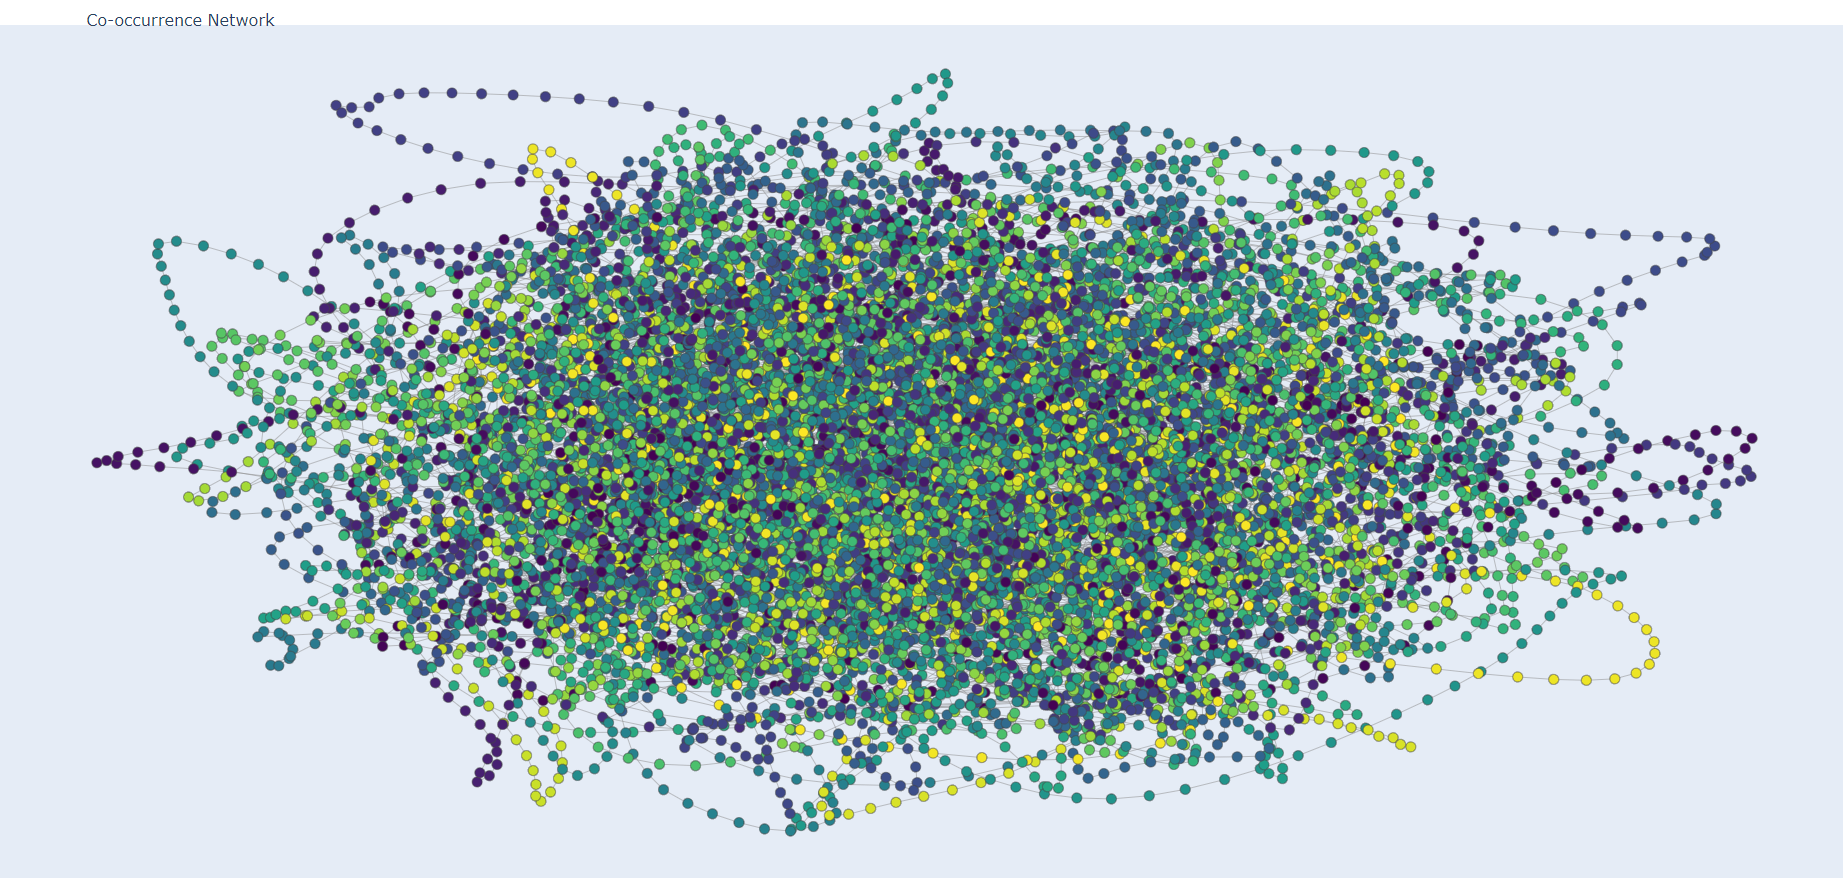